In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

### **Task description**

We have the following task: 
\\[ \begin{cases} \frac{\partial{u}}{\partial{t}} = a\frac{\partial^{2}{u}}{\partial{t}^{2}} + f(x,t)\\  u(x,0)=x^4-x\\ u(0,t)=t^2-t\\ u(1,t)=t^2+t(1-e) \end{cases} \\] 
Also we know, that:    
\\[ a=0.0313 \\]
\\[ f(x,t) = x+2t-e^{x}-a(12x^2-te^{x}) \\]
\\[ u(x,t) = x^4-x+tx+t^2-te^{x}\\]

---
We have explicit difference schema for solving equation numerically:     
\\[ u^{n+1}_{j} = (1-2r)u^{n}_{j} + ru^{n}_{j+1} + ru^{n}_{j-1} \qquad r=\frac{a\tau}{h^{2}}\\]
\\[ n=0...N_{t}-1 \qquad j=1,..,N_{x}-1 \\]


### **Data collecting and implementing algorithm**

In [ ]:
def Solve_heat_equation(step_x=0.1, step_t=0.1):
  # preliminary operations
  Nx = round(1/step_x)
  Nt = round(1/step_t)
  a = 0.0313

  # u(x, 0) = phi(x)
  def phi(x):
    return x**4 - x
  
  # u(0, t) = ksi(t)
  def ksi(t):
    return t**2 - t

  # u(1, t) = omega(t)
  def omega(t):
    return t**2 + t*(1-math.exp(1))

  def f(x, t):
    return x + 2*t - math.exp(x) - a*(12*x**2 - t*math.exp(x))
  def u(x, t):
    return x**4 - x + t*x + t**2 - t*math.exp(x)

  Grid = np.zeros((Nt+1, Nx+1))
  SolGrid = [[u(n*step_x, j*step_t) for n in range(Nx+1)] for j in range(Nt+1)]

  # fill grid with initial data:
  for i in range(Nt+1):
    Grid[i][0] = ksi(i*step_t)
  for i in range(Nx+1):
    Grid[0][i] = phi(i*step_x)
  for i in range(Nt+1):
    Grid[i][Nx] = omega(i*step_t)

  r = step_t*a/(step_x**2)
  # explicit method loop
  for n in range(0, Nt):
    for j in range(1, Nx):
      Grid[n+1][j] = (1-2*r)*Grid[n][j] + r*Grid[n][j+1] + r*Grid[n][j-1] + step_t*f(j*step_x, n*step_t)

  return Grid, SolGrid, step_x, step_t

### **Compute errors**

In [ ]:
# Compute error
def DisNorm(Grid, SolGrid):
  max1 = 0
  idx = (0, 0)
  for i in range(1, nt+1):
    for j in range(1, nx+1):
      if abs(Grid[i][j]-SolGrid[i][j]) > max1:
        max1 = abs(Grid[i][j]-SolGrid[i][j])
        idx = (i, j)
  return max1, idx

x_vals = [0.1, 0.01, 0.001]
t_vals = [0.1, 0.01, 0.001]

# errors for solutions
print('t = 0.1    0.01    0.001')
for x in x_vals:
  for t in t_vals:
    Grid, SolGrid, step_x, step_t = Solve_heat_equation(x, t)
    nx = round(1/step_x)
    nt = round(1/step_t)
    max1, idx = DisNorm(Grid, SolGrid)
    print(max1, end=' | ')
  print()
print()

t = 0.1    0.01    0.001
0.09760516055916724 | 0.009135844158963069 | 0.00038471573230736134 | 
1861964293475282.5 | 2.5005485661534825e+98 | 0.0009709667180202164 | 
2.0372682203630437e+33 | 1.0381050544980127e+300 | 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars


inf | 



### **Plots**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


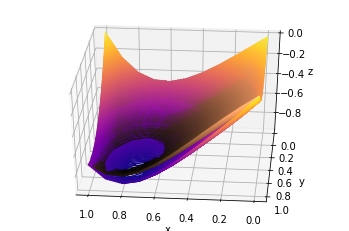

In [ ]:
def plot_3d():
  fig = plt.figure()
  ax = plt.axes(projection='3d')

  Nt = round(1/step_t)
  Nx = round(1/step_x)
  T = [i*step_t for i in range(0, Nt+1)]
  X = [i*step_x for i in range(0, Nx+1)]
  Z1 = SolGrid
  Z2 = Grid

  # black - original solution, plasma - numerical
  ax.contour3D(X, T, Z1, 150, cmap='copper')
  # colorful - numerical solution
  ax.contour3D(X, T, Z2, 250, cmap='plasma')
  # ax.plot_surface(T, X, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
  ax.view_init(35, 95)

  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  
Grid, SolGrid, step_x, step_t = Solve_heat_equation(0.1, 0.1)
plot_3d()

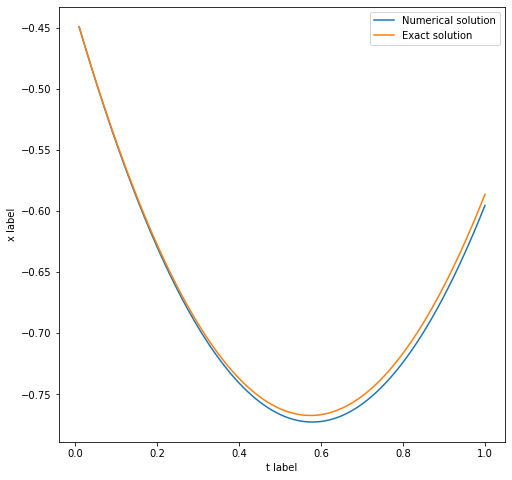

In [ ]:
def plot_sol(x=0.5):
  figure, ax = plt.subplots(figsize=(8, 8))
  idx = round(x/step_x)
  Nt = round(1/step_t)
  Nx = round(1/step_x)
  t = [i*step_t for i in range(1, Nt+1)]
  x_apprx = [Grid[i][idx] for i in range(1, Nt+1)]
  # x_apprx = [LagPol(i*step_t, Grid[i][:Nx], Nx) for i in range(1, Nt+1)]
  x_sol = [SolGrid[i][idx] for i in range(1, Nt+1)]

  ax.plot(t, x_apprx, label='Numerical solution')
  ax.plot(t, x_sol, label='Exact solution')
  plt.xlabel('t label')
  plt.ylabel('x label')
  plt.legend()

Grid, SolGrid, step_x, step_t = Solve_heat_equation(0.1, 0.01)
plot_sol(0.5)